In [75]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [76]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving 2005-2022-local-authority-ghg-emissions-csv-dataset.csv to 2005-2022-local-authority-ghg-emissions-csv-dataset (2).csv


In [77]:
df = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')
df.head(5)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [78]:
df.shape

(533016, 15)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

In [80]:
df.describe()

,Calendar Year,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
count,533016.000000,533016.000000,533016.000000,532602.000000,532602.000000
mean,2013.485747,17.121331,12.005353,179.277772,693.698270
std,5.194708,96.961376,49.060174,121.127481,1738.087974
min,2005.000000,-2854.921188,0.000000,2.210000,3.149600
25%,2009.000000,0.039800,0.000000,102.717169,95.093000
50%,2013.000000,0.534011,0.000000,139.511000,269.239700
75%,2018.000000,5.268804,0.000000,225.234000,641.182900
max,2022.000000,10542.349240,4091.073264,1157.603000,26473.949600


In [81]:
df.isnull().sum()

,0
Country,0
Country Code,414
Region,0
Region Code,414
Second Tier Authority,414
Local Authority,0
Local Authority Code,0
Calendar Year,0
LA GHG Sector,0
LA GHG Sub-sector,0


In [82]:
df.Country.unique()

array(['England', 'Unallocated', 'Northern Ireland', 'Scotland', 'Wales'],
      dtype=object)

In [83]:
# Ensure correct filtering (again clearly)
yh_df = df[
    (df['Country'] == 'England') &
    (df['Region'] == 'Yorkshire and the Humber') &
    (df['Local Authority'] != 'Unallocated')
]


In [84]:
# Columns to drop
columns_to_drop = [
    'Country', 'Country Code', 'Region Code',
    'Second Tier Authority', 'Local Authority Code',
    'Greenhouse gas'
]

# Drop the unnecessary columns
df1 = yh_df.drop(columns=columns_to_drop)

# Check final cleaned dataframe structure
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
Index: 22865 entries, 13482 to 388720
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region                                                       22865 non-null  object 
 1   Local Authority                                              22865 non-null  object 
 2   Calendar Year                                                22865 non-null  int64  
 3   LA GHG Sector                                                22865 non-null  object 
 4   LA GHG Sub-sector                                            22865 non-null  object 
 5   Territorial emissions (kt CO2e)                              22865 non-null  float64
 6   CO2 emissions within the scope of influence of LAs (kt CO2)  22865 non-null  float64
 7   Mid-year Population (thousands)                              22865 non-null  

,Region,Local Authority,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
13482,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Electricity,0.272135,0.272135,255.159,81.4974
13483,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Electricity,0.008540,0.000000,255.159,81.4974
13484,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Electricity,0.001100,0.000000,255.159,81.4974
13485,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Gas,0.245342,0.245342,255.159,81.4974
13486,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Gas,0.008250,0.000000,255.159,81.4974


In [85]:
df1.shape

(22865, 9)

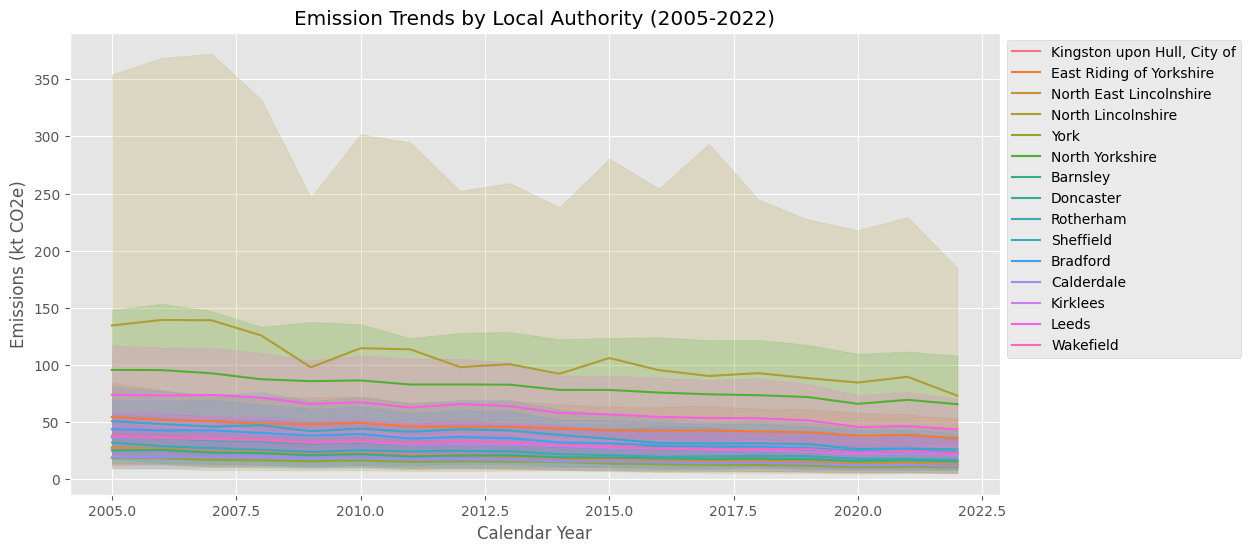

In [86]:
#  Understand trends, patterns, and differences in emissions across local authorities.

plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='Local Authority')
plt.title('Emission Trends by Local Authority (2005-2022)')
plt.ylabel('Emissions (kt CO2e)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


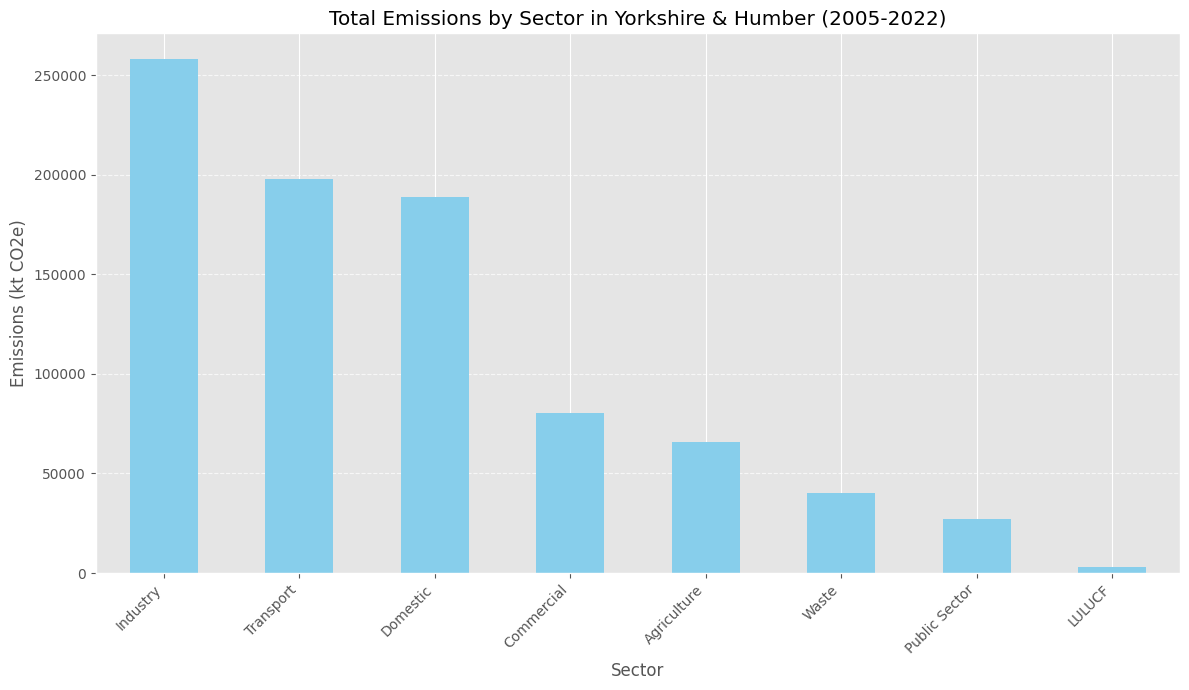

In [87]:
# Find out which sectors/sub-sectors contribute most significantly.
# Aggregate emissions by GHG sector
sector_emissions = df1.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)']\
                      .sum().sort_values(ascending=False)

# Plot results
plt.figure(figsize=(12, 7))
sector_emissions.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Sector in Yorkshire & Humber (2005-2022)')
plt.ylabel('Emissions (kt CO2e)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


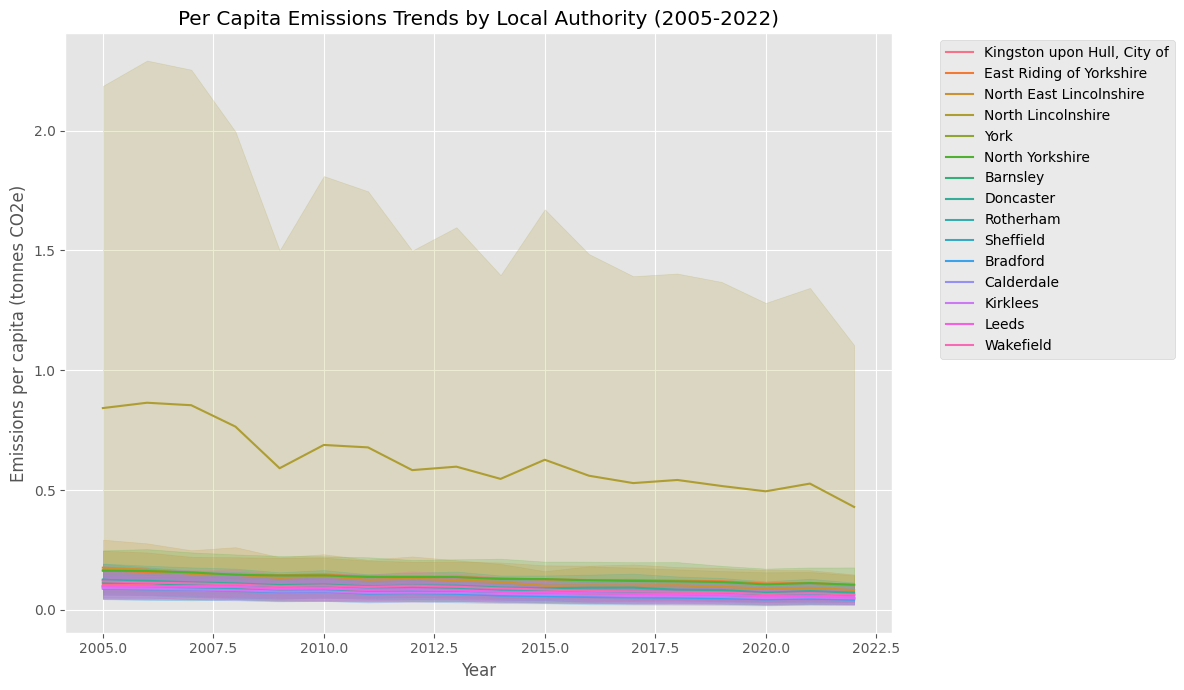

In [88]:
# Calculate per-capita emissions (tonnes CO2e per person)
df1['Emissions per capita (t CO2e)'] = (df1['Territorial emissions (kt CO2e)'] * 1000) / (df1['Mid-year Population (thousands)'] * 1000)

# Visualize per-capita emissions trends
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df1,
    x='Calendar Year',
    y='Emissions per capita (t CO2e)',
    hue='Local Authority'
)
plt.title('Per Capita Emissions Trends by Local Authority (2005-2022)')
plt.ylabel('Emissions per capita (tonnes CO2e)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [89]:
from scipy.stats import zscore

# Compute Z-scores within each Local Authority
df1['z_score'] = df1.groupby('Local Authority')['Territorial emissions (kt CO2e)']\
                    .transform(lambda x: np.abs(zscore(x)))

# Identify outliers (commonly using threshold z > 3)
outliers_df = df1[df1['z_score'] > 3]

# Display outliers clearly
print(outliers_df[['Local Authority', 'Calendar Year', 'Territorial emissions (kt CO2e)', 'z_score']])


                    Local Authority  Calendar Year  \
13495   Kingston upon Hull, City of           2005   
13504   Kingston upon Hull, City of           2005   
13507   Kingston upon Hull, City of           2005   
13516   Kingston upon Hull, City of           2005   
13552   Kingston upon Hull, City of           2005   
...                             ...            ...   
388489                    Wakefield           2020   
388574                    Wakefield           2021   
388624                    Wakefield           2021   
388659                    Wakefield           2022   
388711                    Wakefield           2022   

        Territorial emissions (kt CO2e)   z_score  
13495                        280.453103  4.825682  
13504                        256.030937  4.373980  
13507                        324.113818  5.633214  
13516                        201.662605  3.368404  
13552                        253.917394  4.334888  
...                                 ...

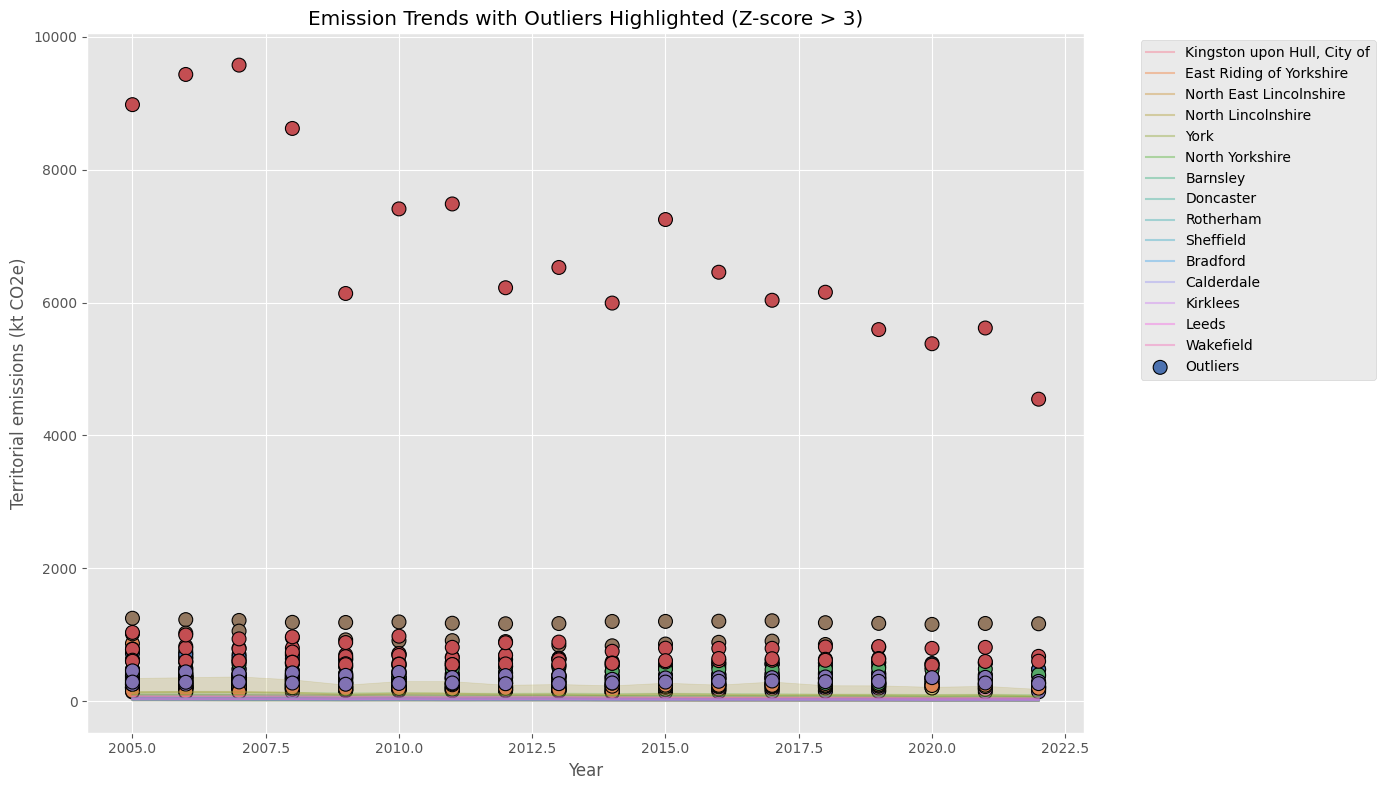

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for outliers (Z-score > 3)
outliers = df1[df1['z_score'] > 3]

# Plot each Local Authority's emissions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='Local Authority', alpha=0.4)

# Overlay outliers as red points
sns.scatterplot(
    data=outliers,
    x='Calendar Year',
    y='Territorial emissions (kt CO2e)',
    hue='Local Authority',
    palette='deep',
    marker='o',
    edgecolor='black',
    s=100,
    legend=False,
    label='Outliers'
)

plt.title('Emission Trends with Outliers Highlighted (Z-score > 3)')
plt.ylabel('Territorial emissions (kt CO2e)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
!pip install prophet

In [92]:
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [93]:
# who is reducing emmissions quicker
# Create pivot of emissions per LA per year
pivot_df = agg_df.pivot(index='Calendar Year', columns='Local Authority', values='Territorial emissions (kt CO2e)')

# Calculate percentage reduction 2005 → 2022
emission_reduction = (
    (pivot_df.loc[2005] - pivot_df.loc[2022]) / pivot_df.loc[2005] * 100
).reset_index()

emission_reduction.columns = ['Local Authority', 'Emission Reduction (%)']
emission_reduction = emission_reduction.sort_values(by='Emission Reduction (%)', ascending=False)
print(emission_reduction)

                Local Authority  Emission Reduction (%)
8       North East Lincolnshire               53.726774
5   Kingston upon Hull, City of               52.439357
12                    Sheffield               49.316690
11                    Rotherham               48.402232
1                      Bradford               46.581172
14                         York               45.878103
9            North Lincolnshire               45.020639
6                      Kirklees               42.698012
7                         Leeds               41.928969
2                    Calderdale               41.762475
13                    Wakefield               39.044531
3                     Doncaster               37.336461
0                      Barnsley               37.299509
4      East Riding of Yorkshire               34.741395
10              North Yorkshire               30.525557


In [94]:
from scipy.stats import linregress

trends = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la]
    if la_df.shape[0] < 5:
        continue
    slope, _, _, _, _ = linregress(la_df['Calendar Year'], la_df['Territorial emissions (kt CO2e)'])
    trends.append({'Local Authority': la, 'Emission Trend (slope)': slope})

trend_df = pd.DataFrame(trends).sort_values(by='Emission Trend (slope)')


In [95]:
total_emissions = agg_df.groupby('Local Authority')['Territorial emissions (kt CO2e)'].sum().reset_index()
total_emissions = total_emissions.sort_values(by='Territorial emissions (kt CO2e)', ascending=False)
total_emissions.columns = ['Local Authority', 'Total Emissions 2005–2022 (kt CO2e)']


In [96]:
# Group emissions by Local Authority, Sector, and Year
sector_trend_df = df1.groupby(['Local Authority', 'LA GHG Sector', 'Calendar Year'])['Territorial emissions (kt CO2e)'].sum().reset_index()

# Pivot to compare 2005 vs 2022 emissions per sector
pivot_sector = sector_trend_df.pivot_table(
    index=['Local Authority', 'LA GHG Sector'],
    columns='Calendar Year',
    values='Territorial emissions (kt CO2e)'
)

# Keep only rows that have both 2005 and 2022
pivot_sector = pivot_sector.dropna(subset=[2005, 2022])

# Calculate percentage change
pivot_sector['% Change 2005–2022'] = ((pivot_sector[2022] - pivot_sector[2005]) / pivot_sector[2005]) * 100
pivot_sector = pivot_sector.reset_index()

# Sort to find biggest reductions
pivot_sector_sorted = pivot_sector.sort_values(by='% Change 2005–2022')

# Show top 15 reducing sectors
pivot_sector_sorted.head(15)


Calendar Year,Local Authority,LA GHG Sector,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,% Change 2005–2022
100,Sheffield,LULUCF,1.193421,-0.340928,-1.296278,-2.498662,-3.654332,-4.060941,-4.774951,-4.139284,...,-6.689773,-7.466124,-6.542136,-7.833399,-7.293691,-7.475557,-8.282778,-7.497274,-7.040920,-689.977697
71,North East Lincolnshire,Waste,131.831616,124.250881,36.292687,70.116881,58.154376,55.405914,44.904026,44.264210,...,27.126712,31.386584,32.180679,37.605643,30.548154,29.374549,29.039456,23.012496,19.210984,-85.427635
47,"Kingston upon Hull, City of",Waste,219.806264,207.587469,154.444496,182.771643,187.824003,150.327090,160.138369,148.837349,...,44.264755,48.542479,39.326367,44.114490,38.516414,38.245824,37.665906,42.643360,33.853794,-84.598349
15,Bradford,Waste,291.700945,277.021812,330.934433,291.510244,269.217017,222.037298,146.842829,129.667756,...,76.965414,76.431626,74.391884,77.290041,71.621531,61.087464,69.618994,74.646929,74.787431,-74.361608
21,Calderdale,Public Sector,97.480909,94.205241,90.321528,89.139751,76.727343,84.167456,76.738191,80.568860,...,65.353421,61.665569,53.854579,52.735817,48.106166,38.304427,32.900482,29.416449,27.790346,-71.491499
111,Wakefield,Waste,245.604700,229.158712,228.058713,209.265890,186.480797,187.191116,187.720943,205.761281,...,168.162844,142.681081,117.849548,115.346972,94.812434,84.708875,79.791584,80.931203,71.146353,-71.032169
97,Sheffield,Commercial,825.133722,817.929133,793.710969,804.360880,665.489260,698.932131,662.720477,679.591469,...,584.765128,472.169227,408.938673,340.483801,363.161508,317.994116,235.918073,264.898552,246.244911,-70.156969
87,North Yorkshire,Waste,365.973121,347.037059,263.751659,192.957484,287.615230,269.887464,247.667889,215.674041,...,146.774741,202.154778,166.361151,176.292787,109.195461,126.568488,125.635591,120.902617,110.393549,-69.835613
91,Rotherham,Industry,880.181745,728.482129,674.582655,599.487896,420.166725,498.211131,515.585085,527.547680,...,499.708988,450.724236,337.780809,347.625551,366.190476,326.117115,323.071507,290.134109,265.817924,-69.799655
117,York,Public Sector,94.126652,92.067099,76.230936,73.472806,66.050445,71.894118,64.179453,65.817315,...,57.935256,50.758587,45.384315,39.334089,34.113298,35.015367,30.993871,37.527375,30.663324,-67.423335


Top 10 Authorities by Emission Reduction (2005–2022):
                Local Authority  Emission Reduction (%)
8       North East Lincolnshire               53.726774
5   Kingston upon Hull, City of               52.439357
12                    Sheffield               49.316690
11                    Rotherham               48.402232
1                      Bradford               46.581172
14                         York               45.878103
9            North Lincolnshire               45.020639
6                      Kirklees               42.698012
7                         Leeds               41.928969
2                    Calderdale               41.762475


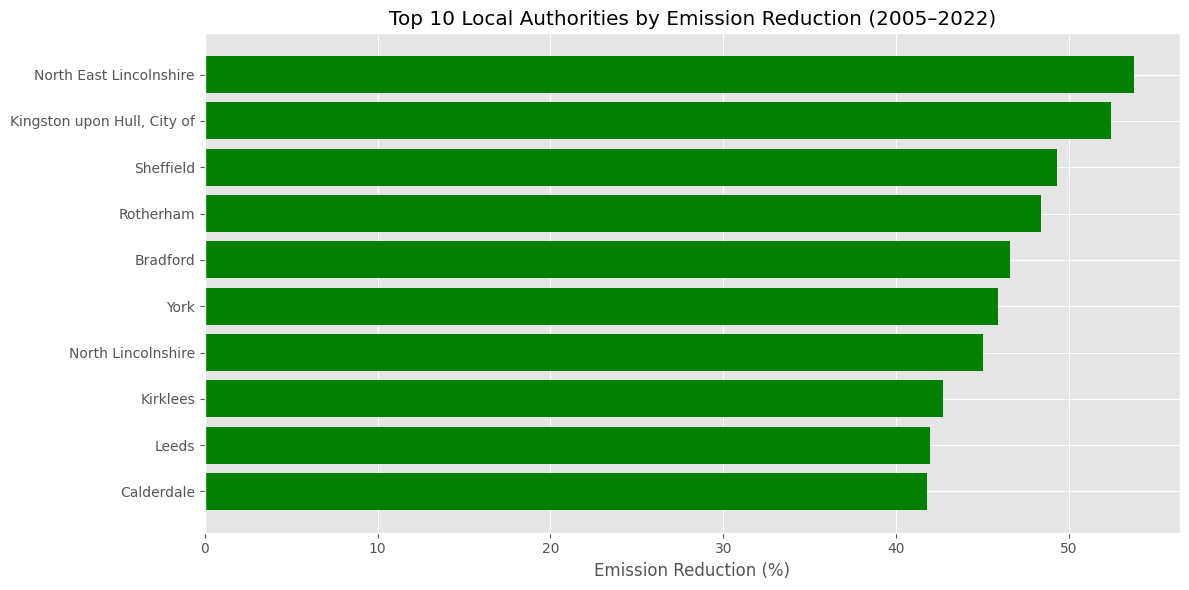

In [97]:

#  Pivot emissions over years
pivot_df = agg_df.pivot(index='Calendar Year', columns='Local Authority', values='Territorial emissions (kt CO2e)')

#  Calculate % reduction from 2005 to 2022
emission_reduction = (
    (pivot_df.loc[2005] - pivot_df.loc[2022]) / pivot_df.loc[2005] * 100
).reset_index()

emission_reduction.columns = ['Local Authority', 'Emission Reduction (%)']
emission_reduction_sorted = emission_reduction.sort_values(by='Emission Reduction (%)', ascending=False)

#  View top reducers
print("Top 10 Authorities by Emission Reduction (2005–2022):")
print(emission_reduction_sorted.head(10))


top10 = emission_reduction_sorted.head(10)
plt.figure(figsize=(12,6))
plt.barh(top10['Local Authority'], top10['Emission Reduction (%)'], color='green')
plt.xlabel('Emission Reduction (%)')
plt.title('Top 10 Local Authorities by Emission Reduction (2005–2022)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [98]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

metrics_list = []

# Define 2019 as a special holiday year
special_events = pd.DataFrame({
    'holiday': ['low_emission_year'],
    'ds': pd.to_datetime(['2019']),
    'lower_window': 0,
    'upper_window': 364  # Covers the entire year
})

# Loop over each local authority
for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la]

    if la_df.shape[0] < 8:
        continue  # Skip if not enough data

    # Prepare Prophet dataframe
    prophet_df = la_df.rename(columns={
        'Calendar Year': 'ds',
        'Territorial emissions (kt CO2e)': 'y'
    })
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

    # Train model up to 2020
    model = Prophet(holidays=special_events)
    model.fit(prophet_df[prophet_df['ds'].dt.year <= 2020])

    # Forecast for 2021 and 2022
    future = model.make_future_dataframe(periods=2, freq='YS')  # YS = Year Start
    forecast = model.predict(future)

    # Merge with actual data for evaluation
    merged = pd.merge(
        forecast[['ds', 'yhat']],
        prophet_df[prophet_df['ds'].dt.year.between(2021, 2022)],
        on='ds',
        how='inner'
    )

    if merged.empty:
        continue

    y_true = merged['y']
    y_pred = merged['yhat']

    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    metrics_list.append({
        'Local Authority': la,
        'MAE (2021–22)': round(mae, 2),
        'RMSE (2021–22)': round(rmse, 2),
        'MAPE (%) (2021–22)': round(mape, 2),
        'R² (2021–22)': round(r2, 4)

    })

# Build and display final DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='R² (2021–22)', ascending=False)
metrics_df.reset_index(drop=True, inplace=True)
metrics_df.head(15)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/nzt9dztt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/550i3_j6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87413', 'data', 'file=/tmp/tmppy0_xkbr/nzt9dztt.json', 'init=/tmp/tmppy0_xkbr/550i3_j6.json', 'output', 'file=/tmp/tmppy0_xkbr/prophet_model47kuyg91/prophet_model-20250411064057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:40:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,Local Authority,MAE (2021–22),RMSE (2021–22),MAPE (%) (2021–22),R² (2021–22)
0,Doncaster,4.07,4.40,0.20,0.9932
1,York,15.72,15.89,1.79,0.7666
2,Leeds,64.97,86.97,1.65,0.5564
3,East Riding of Yorkshire,68.50,86.34,2.23,0.5077
4,Calderdale,32.28,42.99,3.06,0.1709
5,Kirklees,64.35,82.83,3.29,-0.0313
6,Rotherham,58.32,58.37,3.98,-0.7156
7,Bradford,158.81,166.79,7.42,-1.6665
8,Wakefield,104.30,106.10,5.06,-2.3139
9,North Lincolnshire,1010.23,1215.70,13.70,-2.7388


In [99]:
# Visualise actual vs predicted for 2019–2022
def plot_recent_mismatch(la_name):
    la_df = agg_df[agg_df['Local Authority'] == la_name].sort_values('Calendar Year')
    la_df['ds'] = pd.to_datetime(la_df['Calendar Year'], format='%Y')
    la_df = la_df.rename(columns={'Territorial emissions (kt CO2e)': 'y'})

    model = Prophet()
    model.fit(la_df[['ds', 'y']])
    future = model.make_future_dataframe(periods=0)  # Just till 2022
    forecast = model.predict(future)

    recent = forecast[forecast['ds'].dt.year >= 2020]
    actual_recent = la_df[la_df['ds'].dt.year >= 2020]

    plt.figure(figsize=(10, 4))
    plt.plot(actual_recent['ds'], actual_recent['y'], label='Actual', marker='o', color='black')
    plt.plot(recent['ds'], recent['yhat'], label='Predicted', marker='x', color='green')
    plt.fill_between(recent['ds'], recent['yhat_lower'], recent['yhat_upper'], color='lightgreen', alpha=0.3)
    plt.title(f"Recent Trend Mismatch for {la_name}")
    plt.ylabel("Emissions (kt CO₂e)")
    plt.xlabel("Year")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/g3faar1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/grlss6iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31742', 'data', 'file=/tmp/tmppy0_xkbr/g3faar1k.json', 'init=/tmp/tmppy0_xkbr/grlss6iv.json', 'output', 'file=/tmp/tmppy0_xkbr/prophet_modelsp3btpp9/prophet_model-20250411064233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:42:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:

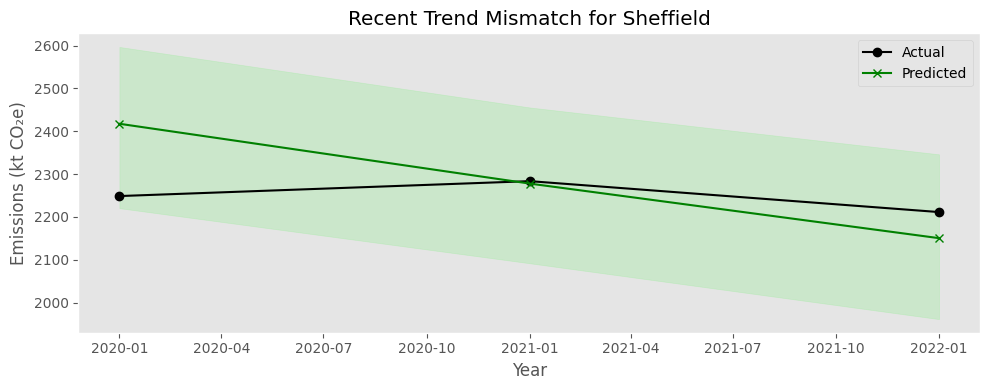

In [100]:
plot_recent_mismatch('Sheffield')

In [101]:
from scipy.stats import ttest_rel
import pandas as pd

t_test_results = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la].copy()
    if la_df.shape[0] < 8:
        continue

    prophet_df = la_df.rename(columns={'Calendar Year': 'ds', 'Territorial emissions (kt CO2e)': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

    model = Prophet()
    model.fit(prophet_df[prophet_df['ds'].dt.year <= 2020])  # Train up to 2020

    future = model.make_future_dataframe(periods=2, freq='YS')  # Forecast 2021–2022
    forecast = model.predict(future)

    # Merge actual and predicted
    merged = pd.merge(
        forecast[['ds', 'yhat']],
        prophet_df[prophet_df['ds'].dt.year.isin([2021, 2022])],
        on='ds',
        how='inner'
    )

    if merged.shape[0] < 2:
        continue

    y_true = merged['y'].values
    y_pred = merged['yhat'].values

    t_stat, p_value = ttest_rel(y_true, y_pred)

    t_test_results.append({
        'Local Authority': la,
        't-statistic': round(t_stat, 4),
        'p-value': round(p_value, 4),
        'Significant? (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
    })

# Display as DataFrame
# Display as a table in Colab
t_test_df = pd.DataFrame(t_test_results).sort_values(by='p-value')
t_test_df.head(15)  # Or just: display(t_test_df)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/jwe7nfmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/40yjgjpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53727', 'data', 'file=/tmp/tmppy0_xkbr/jwe7nfmc.json', 'init=/tmp/tmppy0_xkbr/40yjgjpi.json', 'output', 'file=/tmp/tmppy0_xkbr/prophet_modellz7k6qbj/prophet_model-20250411064234.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:42:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,Local Authority,t-statistic,p-value,Significant? (p < 0.05)
5,"Kingston upon Hull, City of",30.2656,0.0210,Yes
0,Barnsley,17.7719,0.0358,Yes
3,Doncaster,-16.6327,0.0382,Yes
8,North East Lincolnshire,7.5419,0.0839,No
11,Rotherham,4.8802,0.1287,No
13,Wakefield,3.5472,0.1749,No
1,Bradford,2.5401,0.2388,No
10,North Yorkshire,2.5295,0.2397,No
12,Sheffield,2.1739,0.2745,No
9,North Lincolnshire,1.3818,0.3988,No


In [102]:
!pip install prophet
import pandas as pd
from prophet import Prophet
from tqdm import tqdm

# STEP 1: Aggregate emissions per Local Authority per Year
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['Territorial emissions (kt CO2e)'].sum().reset_index()

# STEP 2: Forecast + classify
forecast_results = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la]

    if la_df.shape[0] < 5:
        continue

    prophet_df = la_df.rename(columns={'Calendar Year': 'ds', 'Territorial emissions (kt CO2e)': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

    try:
        model = Prophet()
        model.fit(prophet_df)

        future = model.make_future_dataframe(periods=28, freq='YS')  # Force full years
        forecast = model.predict(future)
        forecast['year'] = forecast['ds'].dt.year
        forecast_2050 = forecast[forecast['year'] == 2050]

        if not forecast_2050.empty:
            yhat_2050 = forecast_2050.iloc[0]['yhat']
            net_zero = "Yes" if yhat_2050 <= 0 else "No"

            forecast_results.append({
                'Local Authority': la,
                'Predicted Emissions 2050 (kt CO2e)': round(yhat_2050, 2),
                'On Track for Net Zero': net_zero
            })

    except Exception as e:
        print(f" Failed for {la}: {e}")
        continue

# STEP 3: Results DataFrame
forecast_df = pd.DataFrame(forecast_results).sort_values(by='Predicted Emissions 2050 (kt CO2e)')
forecast_df.reset_index(drop=True, inplace=True)
forecast_df.head(15)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/noo_ld8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/ox9l_jv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26483', 'data', 'file=/tmp/tmppy0_xkbr/noo_ld8d.json', 'init=/tmp/tmppy0_xkbr/ox9l_jv0.json', 'output', 'file=/tmp/tmppy0_xkbr/prophet_modelm8e1540l/prophet_model-20250411064249.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:42:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,Local Authority,Predicted Emissions 2050 (kt CO2e),On Track for Net Zero
0,North Lincolnshire,-1608.08,Yes
1,Sheffield,-1473.27,Yes
2,Bradford,-1005.80,Yes
3,North East Lincolnshire,-836.53,Yes
4,Leeds,-798.83,Yes
5,"Kingston upon Hull, City of",-661.56,Yes
6,Rotherham,-393.20,Yes
7,Calderdale,-373.45,Yes
8,Kirklees,-372.65,Yes
9,York,-271.67,Yes


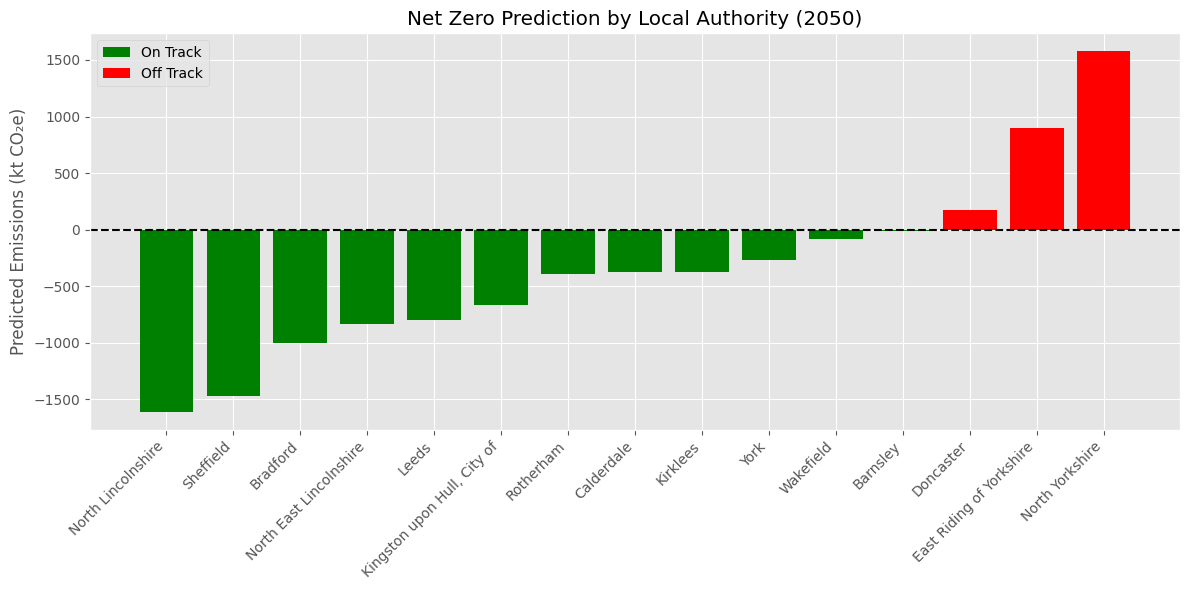

In [103]:
import matplotlib.pyplot as plt

# Split by classification
on_track = forecast_df[forecast_df['On Track for Net Zero'] == "Yes"]
off_track = forecast_df[forecast_df['On Track for Net Zero'] == "No"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(on_track['Local Authority'], on_track['Predicted Emissions 2050 (kt CO2e)'], label='On Track', color='green')
plt.bar(off_track['Local Authority'], off_track['Predicted Emissions 2050 (kt CO2e)'], label='Off Track', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Predicted Emissions (kt CO₂e)')
plt.title('Net Zero Prediction by Local Authority (2050)')
plt.legend()
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/dqws97yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppy0_xkbr/zdgh5c25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61601', 'data', 'file=/tmp/tmppy0_xkbr/dqws97yj.json', 'init=/tmp/tmppy0_xkbr/zdgh5c25.json', 'output', 'file=/tmp/tmppy0_xkbr/prophet_modelsme9bsq6/prophet_model-20250411064256.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:

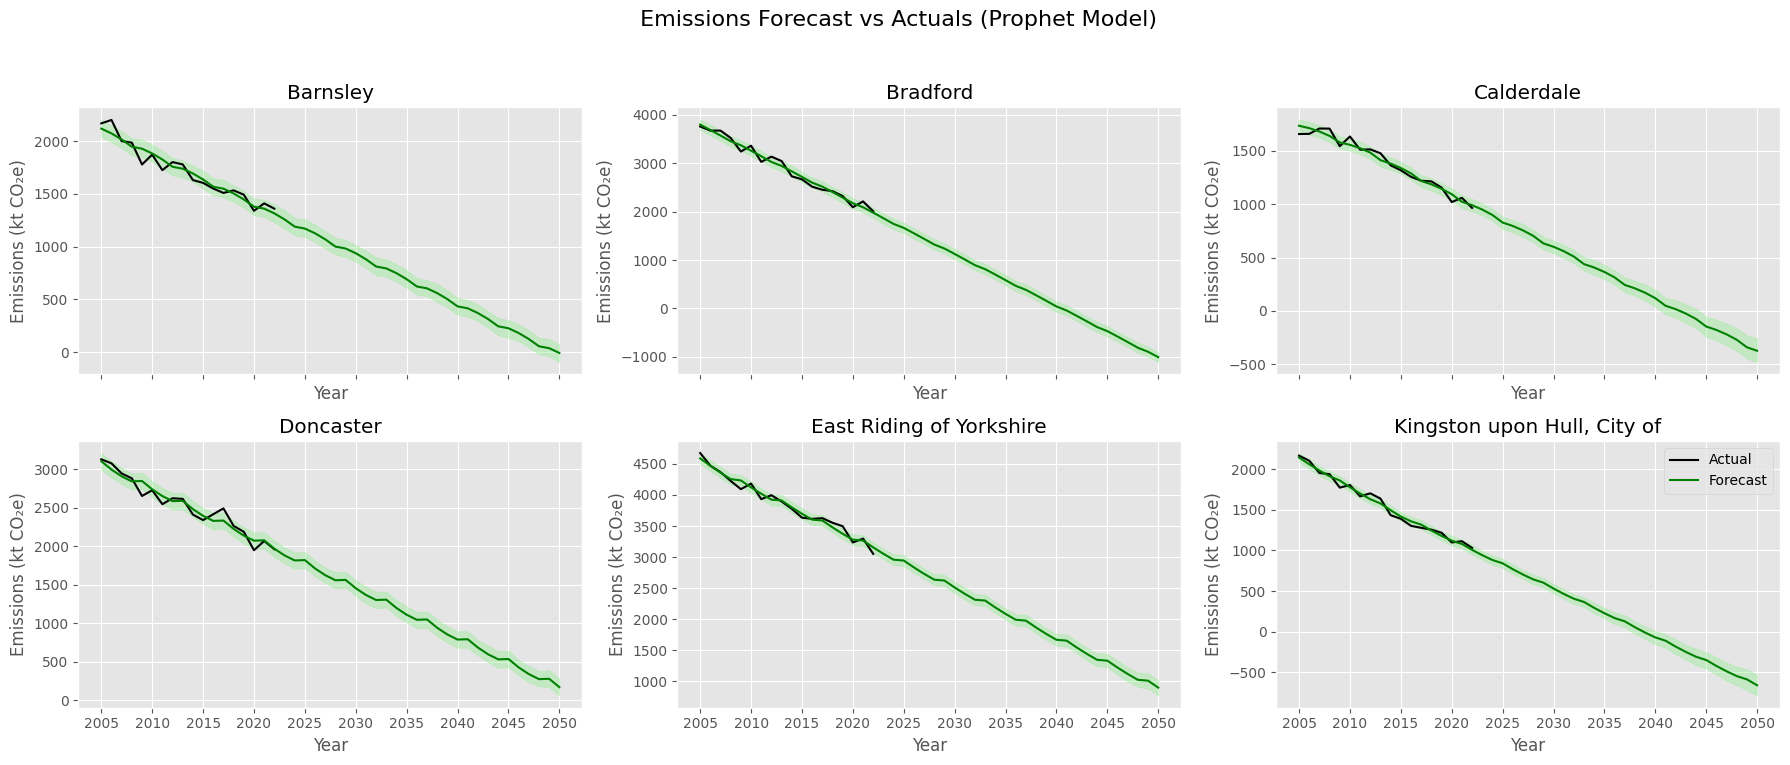

In [104]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Aggregate emissions
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['Territorial emissions (kt CO2e)'].sum().reset_index()

# Choose LAs with enough years of data
valid_las = agg_df['Local Authority'].value_counts()
valid_las = valid_las[valid_las >= 10].index.tolist()
selected_las = valid_las[:6]  # Pick top 6 for visual

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharex=True)
axes = axes.flatten()

for i, la in enumerate(selected_las):
    la_df = agg_df[agg_df['Local Authority'] == la].sort_values('Calendar Year')
    la_df['ds'] = pd.to_datetime(la_df['Calendar Year'], format='%Y')
    la_df = la_df.rename(columns={'Territorial emissions (kt CO2e)': 'y'})

    try:
        model = Prophet()
        model.fit(la_df[['ds', 'y']])
        future = model.make_future_dataframe(periods=28, freq='YS')
        forecast = model.predict(future)

        ax = axes[i]
        ax.plot(la_df['ds'], la_df['y'], label='Actual', color='black')
        ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.4)
        ax.set_title(f"{la}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Emissions (kt CO₂e)")

    except Exception:
        axes[i].set_title(f"{la} (Error)")
        continue

fig.suptitle(" Emissions Forecast vs Actuals (Prophet Model)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend()
plt.show()
